##Importing the Required Libraries

In [2]:
import numpy
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils
import os

##Loading the Data

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


##Analyzing the Data

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
y_train[0]

5

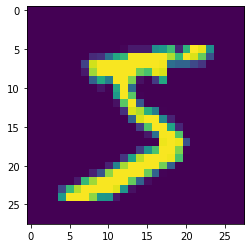

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

##Reshaping the Data

In [8]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

##Applying One Hot Encoding

In [9]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

##Add CNN layers

In [12]:
model = Sequential()
model.add(Conv2D(64,(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes, activation='softmax'))

##Compiling the Model

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

##Train the Model

In [14]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 205s 109ms/step - loss: 0.2951 - accuracy: 0.9492 - val_loss: 0.1064 - val_accuracy: 0.9698
Epoch 2/5
1875/1875 [==============================] - 200s 107ms/step - loss: 0.0753 - accuracy: 0.9769 - val_loss: 0.0773 - val_accuracy: 0.9755
Epoch 3/5
1875/1875 [==============================] - 202s 108ms/step - loss: 0.0484 - accuracy: 0.9849 - val_loss: 0.0761 - val_accuracy: 0.9781
Epoch 4/5
1875/1875 [==============================] - 201s 107ms/step - loss: 0.0369 - accuracy: 0.9887 - val_loss: 0.0896 - val_accuracy: 0.9767
Epoch 5/5
1875/1875 [==============================] - 202s 108ms/step - loss: 0.0315 - accuracy: 0.9901 - val_loss: 0.0998 - val_accuracy: 0.9767


##Observing the Metrics

In [15]:
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.09976129233837128, 0.9767000079154968]


##Test the Model

In [16]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 91ms/step
[[2.1283151e-12 9.2331233e-15 3.5054685e-11 5.6354610e-10 2.6820725e-18
  4.4566257e-16 4.6731850e-20 1.0000000e+00 5.7718224e-13 9.9234638e-09]
 [1.4432392e-07 6.3258447e-09 9.9999976e-01 1.4250795e-10 1.5152416e-11
  3.0315796e-17 2.9639661e-08 4.3997278e-18 1.7874032e-07 2.0954727e-17]
 [2.2535038e-12 1.0000000e+00 2.4829514e-09 2.3346085e-13 5.4119802e-09
  3.9562789e-10 1.3646890e-11 2.4727815e-12 4.7245114e-09 8.1510624e-15]
 [1.0000000e+00 1.9773591e-16 2.3335678e-12 9.1567544e-17 8.7103888e-15
  2.6054092e-12 5.2911991e-10 2.2664232e-15 4.6047207e-12 7.3229346e-14]]


In [17]:
import numpy as np
print(np.argmax(prediction, axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


##Save the Model

In [18]:
model.save('models/mnistCNN.h5')

In [ ]:
model = load_model("model.h5")

In [ ]:
img = Image.open("/content/sample_data/sample.png").convert("L")
img = img.resize((28, 28))
img2arr = np.array(img)
img2arr = img2arr.reshape(1, 28, 28, 1)
results = model.predict(img2arr)
results = np.argmax(results, axis=1)
results = pd.Series(results, name="Label")
print(results)